In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [4]:
plt.style.use('publication.rc')

In [34]:
run_id = 23
f_names = ['/Users/gracetytus/gaps/checkouts/hg_dropped_'+ str(run_id) +'.txt']

In [35]:
with open(f_names[0]) as in_file:
    variables = next(in_file).strip().split(',')
num_lines = -len(f_names)
for name in f_names:
    with open(name) as in_file:
        num_lines += sum(1 for _ in in_file)
data_dict = {}
for var in variables:
    data_dict[var] = np.zeros(num_lines)

In [36]:
k = 0
progress_bar = tqdm(total=num_lines)
for name in f_names:
    with open(name) as in_file:
        next(in_file)
        for line in in_file:
            for j, dat in enumerate(line.strip().split(',')):
                data_dict[variables[j]][k] = float(dat)
            k += 1
            progress_bar.update(1)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [12:18<00:00, 14.19s/it]


In [37]:
dy_dx = np.gradient(data_dict['percent_dropped_hg'], data_dict['met'])

threshold = 0.01

try:
    # Find the index where the derivative is close to zero
    stable_idx = np.where((np.abs(dy_dx) < threshold))[0]
except Exception as e: pass


# The first occurrence of stability
if len(stable_idx) > 0:
    transition_point = x[stable_idx[0]]

/Users/gracetytus/tof_python_env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/gracetytus/tof_python_env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1307: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/gracetytus/tof_python_env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/gracetytus/tof_python_env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1308: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/gracetytus/tof_python_env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/Users/gracetytus/tof_python_env/lib/python3.12/site-packages/numpy/li

NameError: name 'x' is not defined

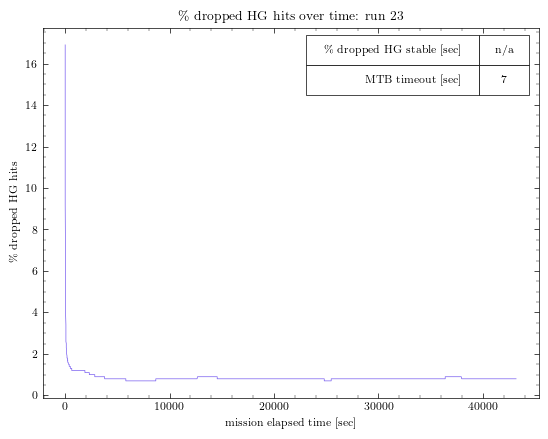

In [39]:
te_timeout = 7

fig, ax = plt.subplots()
ax.plot(data_dict['met'], data_dict['percent_dropped_hg'])
ax.set_title('\\% dropped HG hits over time: run ' + str(run_id))
ax.set_xlabel('mission elapsed time [sec]')
ax.set_ylabel('\\% dropped HG hits')
ax.minorticks_on()
#ax.set_xlim(0, 500)

table_data = [['\\% dropped HG stable [sec]', "n/a"], ['MTB timeout [sec]', str(te_timeout)]]

table = ax.table(cellText=table_data,
                 cellLoc='center',
                 loc='upper right')

table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.0, 1.0)

num_rows, num_cols = len(table_data), len(table_data[0])

for (row, col), cell in table.get_celld().items():
    if row == -1 or col == -1:
        continue

    cell.set_height(0.08)

    if col == 1:
        cell.set_text_props(horizontalalignment='center', verticalalignment='center')
        cell.set_width(0.1)
    else: 
        cell.set_text_props(horizontalalignment='right', verticalalignment='center')
        cell.set_width(0.35)
        
    cell.set_linewidth(0.5)

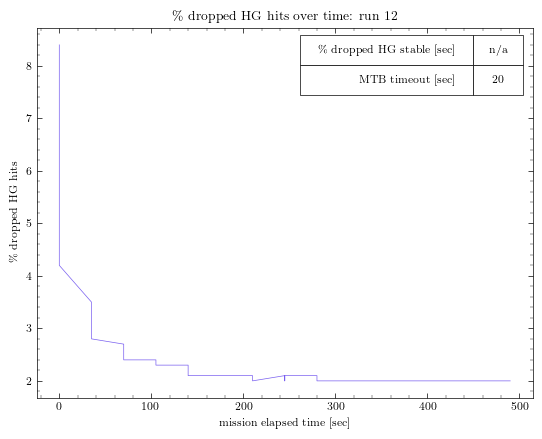

In [26]:
te_timeout = 20
indices = np.where(data_dict['met'] < 500)
filtered_met = data_dict['met'][indices]
filtered_percent_dropped_hg = data_dict['percent_dropped_hg'][indices]

# Plot the filtered data
fig, ax = plt.subplots()
ax.plot(filtered_met, filtered_percent_dropped_hg)
ax.set_title('\\% dropped HG hits over time: run ' + str(run_id))
ax.set_xlabel('mission elapsed time [sec]')
ax.set_ylabel('\\% dropped HG hits')
ax.minorticks_on()

table_data = [['\\% dropped HG stable [sec]', "n/a"], ['MTB timeout [sec]', str(te_timeout)]]

table = ax.table(cellText=table_data,
                 cellLoc='center',
                 loc='upper right')

table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.0, 1.0)

num_rows, num_cols = len(table_data), len(table_data[0])

for (row, col), cell in table.get_celld().items():
    if row == -1 or col == -1:
        continue

    cell.set_height(0.08)

    if col == 1:
        cell.set_text_props(horizontalalignment='center', verticalalignment='center')
        cell.set_width(0.1)
    else: 
        cell.set_text_props(horizontalalignment='right', verticalalignment='center')
        cell.set_width(0.35)
        
    cell.set_linewidth(0.5)